In [1]:
import pandas as pd

In [2]:
import warnings
warnings.simplefilter('ignore')
%pylab inline                 
from pylab import rcParams    
rcParams['figure.figsize'] = 25, 18
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('C:/Users/Battlestation/Downloads/Telegram Desktop/train.csv', sep=',', )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# вот так можно посмотреть статку по объектам выборки - хорошо дополняет df.info()

for c in df.columns:
    n = df[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

PassengerId
891
----------
Survived
2 [(0, 549), (1, 342)]
----------
Pclass
3 [(1, 216), (2, 184), (3, 491)]
----------
Name
891
----------
Sex
2 [('female', 314), ('male', 577)]
----------
Age
88
----------
SibSp
7
----------
Parch
7
----------
Ticket
681
----------
Fare
248
----------
Cabin
147
----------
Embarked
3 [('C', 168), ('Q', 77), ('S', 644)]
----------


In [6]:
# перед началом работы - всегда(!) копируй исходые данные и работай с копией. 

df_pony = df.copy()

In [7]:
df_pony.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


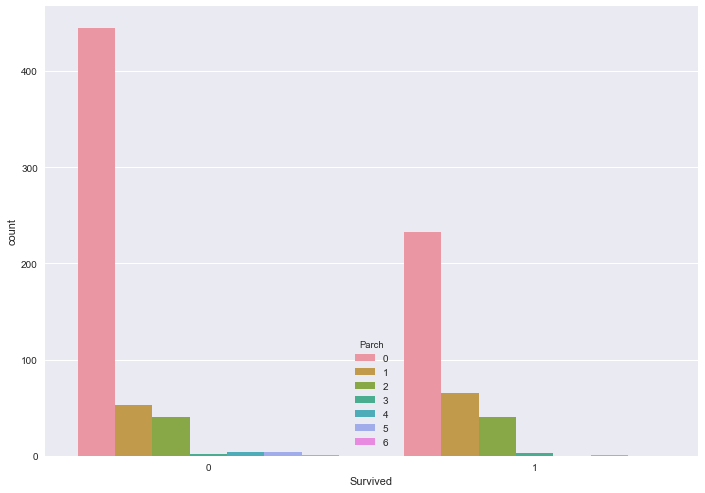

In [8]:
# график - удобный способ посмотреть как именно объявелен признак внурти выборки: 
# значения напротив индикаторов (сейчас циферки) это именно то как записан признак в выборку.

sns.countplot(x='Survived', hue='Parch', data=df);

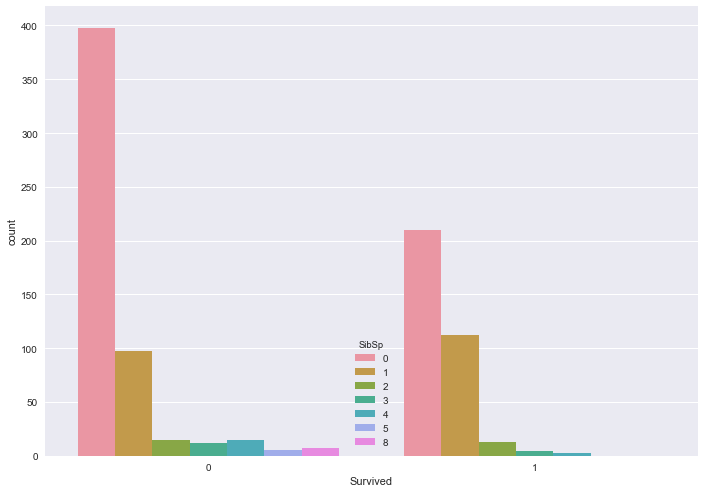

In [9]:
# Смотри - признак SibSp записан как 0, 1, 2, 3, 4, 5, 8, - 6 и 7 ка отсутствуют. 
# Явно искуственная ловушка, так что скорее всего передо мной тестовое, не самое простое.
# Прокся.. если ты стал брать деньги за решение тестовых  -я хочу половину, если сам решил вкатиться..ну
# ну добро пожаловать в мир костылей.

sns.countplot(x='Survived', hue='SibSp', data=df);

In [10]:
# Что бы решать задачи в рамках твоего ТЗ нужно преобразовать данные - разложив выживших по исзвестным типам
# Это сильно приростит выборку вправо создав 2-3 десятка дополнительных признаков, основанных на Survived==1


# В этой операции я создаю новую колонку, которая отвечает условию: все выжили и принадлежат к группе Embarked=='S'

df_pony['Embarked_S'] = ((df_pony.Embarked=='S') & (df_pony.Survived==1)).astype('int64')

# В двух нижних строка я раскладываю новый признак (колонки принято называть признаками) на мужчин и женьщин.

df_pony['Embarked_S_M'] = ((df_pony.Embarked=='S') & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')

# Как видишь мне пришлось написать немало кода, для преобразования данных по выбранным мной признакам.

df_pony['Embarked_S_F'] = ((df_pony.Embarked=='S') & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

"""
В теории, можно написать фукнцию, однако на практике этой себя не оправдывает - лучше и правильнее выписывать построчно все
преобразования, которые ты совершаешь - иначе потом сам запутаешься. Поэтому я советую выписыват ьвсё в один экран.
Кроме того принято различають преобразование первого и второго порядка.
В теории можно было написать df_pony['Embarked_1_C'] где _1 означает:
- что все эти признаки сосзданы на первом проходе - от исходных.
ну. исходные данные фактические - а следующие условно мнимые.
т.е если потом мы решим создать признаки на основе новых
- мы могли бы записать их как _2 == но мне лень.
"""

df_pony['Embarked_C'] = ((df_pony.Embarked=='C') & (df_pony.Survived==1)).astype('int64')
df_pony['Embarked_C_M'] = ((df_pony.Embarked=='C') & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Embarked_C_F'] = ((df_pony.Embarked=='C') & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Embarked_Q'] = ((df_pony.Embarked=='Q') & (df_pony.Survived==1)).astype('int64')
df_pony['Embarked_Q_M'] = ((df_pony.Embarked=='Q') & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Embarked_Q_F'] = ((df_pony.Embarked=='Q') & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Parch_0'] = ((df_pony.Parch==0) & (df_pony.Survived==1)).astype('int64')
df_pony['Parch_0_M'] = ((df_pony.Parch==0) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Parch_0_F'] = ((df_pony.Parch==0) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Parch_1'] = ((df_pony.Parch==1) & (df_pony.Survived==1)).astype('int64')
df_pony['Parch_1_M'] = ((df_pony.Parch==1) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Parch_1_F'] = ((df_pony.Parch==1) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Parch_2'] = ((df_pony.Parch==2) & (df_pony.Survived==1)).astype('int64')
df_pony['Parch_2_M'] = ((df_pony.Parch==2) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Parch_2_F'] = ((df_pony.Parch==2) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Parch_3'] = ((df_pony.Parch==3) & (df_pony.Survived==1)).astype('int64')
df_pony['Parch_3_M'] = ((df_pony.Parch==3) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Parch_3_F'] = ((df_pony.Parch==3) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Parch_4'] = ((df_pony.Parch==4) & (df_pony.Survived==1)).astype('int64')
df_pony['Parch_4_M'] = ((df_pony.Parch==4) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Parch_4_F'] = ((df_pony.Parch==4) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Parch_5'] = ((df_pony.Parch==5) & (df_pony.Survived==1)).astype('int64')
df_pony['Parch_5_M'] = ((df_pony.Parch==5) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Parch_5_F'] = ((df_pony.Parch==5) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Parch_6'] = ((df_pony.Parch==6) & (df_pony.Survived==1)).astype('int64')
df_pony['Parch_6_M'] = ((df_pony.Parch==5) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['Parch_6_F'] = ((df_pony.Parch==5) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['SibSp_0'] = ((df_pony.SibSp==0) & (df_pony.Survived==1)).astype('int64')
df_pony['SibSp_0_M'] = ((df_pony.SibSp==0) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['SibSp_0_F'] = ((df_pony.SibSp==0) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['SibSp_1'] = ((df_pony.SibSp==1) & (df_pony.Survived==1)).astype('int64')
df_pony['SibSp_1_M'] = ((df_pony.SibSp==1) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['SibSp_1_F'] = ((df_pony.SibSp==1) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['SibSp_2'] = ((df_pony.SibSp==2) & (df_pony.Survived==1)).astype('int64')
df_pony['SibSp_2_M'] = ((df_pony.SibSp==2) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['SibSp_2_F'] = ((df_pony.SibSp==2) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['SibSp_3'] = ((df_pony.SibSp==3) & (df_pony.Survived==1)).astype('int64')
df_pony['SibSp_3_M'] = ((df_pony.SibSp==3) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['SibSp_3_F'] = ((df_pony.SibSp==3) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['SibSp_4'] = ((df_pony.SibSp==4) & (df_pony.Survived==1)).astype('int64')
df_pony['SibSp_4_M'] = ((df_pony.SibSp==4) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['SibSp_4_F'] = ((df_pony.SibSp==4) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['SibSp_5'] = ((df_pony.SibSp==5) & (df_pony.Survived==1)).astype('int64')
df_pony['SibSp_5_M'] = ((df_pony.SibSp==5) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['SibSp_5_F'] = ((df_pony.SibSp==5) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['SibSp_8'] = ((df_pony.SibSp==8) & (df_pony.Survived==1)).astype('int64')
df_pony['SibSp_8_M'] = ((df_pony.SibSp==8) & (df_pony.Survived==1)& (df_pony.Sex == "male")).astype('int64')
df_pony['SibSp_8_F'] = ((df_pony.SibSp==8) & (df_pony.Survived==1)& (df_pony.Sex == "female")).astype('int64')

df_pony['Pclass_1'] = ((df_pony.Pclass==1) & (df_pony.Survived==1)).astype('int64')
df_pony['Pclass_1_M'] = ((df_pony.Pclass==1) & (df_pony.Survived==1) & (df_pony.Sex == "male")).astype('int64')
df_pony['Pclass_1_F'] = ((df_pony.Pclass==1) & (df_pony.Survived==1) & (df_pony.Sex == "female")).astype('int64')

df_pony['Pclass_2'] = ((df_pony.Pclass==2) & (df_pony.Survived==1)).astype('int64')
df_pony['Pclass_2_M'] = ((df_pony.Pclass==2) & (df_pony.Survived==1) & (df_pony.Sex == "male")).astype('int64')
df_pony['Pclass_2_F'] = ((df_pony.Pclass==2) & (df_pony.Survived==1) & (df_pony.Sex == "female")).astype('int64')

df_pony['Pclass_3'] = ((df_pony.Pclass==3) & (df_pony.Survived==1)).astype('int64')
df_pony['Pclass_3_M'] = ((df_pony.Pclass==3) & (df_pony.Survived==1) & (df_pony.Sex == "male")).astype('int64')
df_pony['Pclass_3_F'] = ((df_pony.Pclass==3) & (df_pony.Survived==1) & (df_pony.Sex == "female")).astype('int64')

# И это только начало няша, если бы я был на работе я бы ещё 3 страницы вниз прописал. Но для знакомства хватит и этого.

In [11]:
df_pony.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,SibSp_8_F,Pclass_1,Pclass_1_M,Pclass_1_F,Pclass_2,Pclass_2_M,Pclass_2_F,Pclass_3,Pclass_3_M,Pclass_3_F
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_pony.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 72 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Embarked_S      891 non-null int64
Embarked_S_M    891 non-null int64
Embarked_S_F    891 non-null int64
Embarked_C      891 non-null int64
Embarked_C_M    891 non-null int64
Embarked_C_F    891 non-null int64
Embarked_Q      891 non-null int64
Embarked_Q_M    891 non-null int64
Embarked_Q_F    891 non-null int64
Parch_0         891 non-null int64
Parch_0_M       891 non-null int64
Parch_0_F       891 non-null int64
Parch_1         891 non-null int64
Parch_1_M  

In [14]:
# Давай теперь посмотрим статку и глянем нет ли там в фицрах явных совпадений среди разных групп выживших

for c in df_pony.columns:
    n = df_pony[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df_pony[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')
    
    
"""
Вон глянь -  Pclass_1_M\F 49\91 относительно совпадают с Pclass_3_M\F 47\72 в 80% совпадение по ТЗ эти 2 группы впишуться
"""    

PassengerId
891
----------
Survived
2 [(0, 549), (1, 342)]
----------
Pclass
3 [(1, 216), (2, 184), (3, 491)]
----------
Name
891
----------
Sex
2 [('female', 314), ('male', 577)]
----------
Age
88
----------
SibSp
7
----------
Parch
7
----------
Ticket
681
----------
Fare
248
----------
Cabin
147
----------
Embarked
3 [('C', 168), ('Q', 77), ('S', 644)]
----------
Embarked_S
2 [(0, 674), (1, 217)]
----------
Embarked_S_M
2 [(0, 814), (1, 77)]
----------
Embarked_S_F
2 [(0, 751), (1, 140)]
----------
Embarked_C
2 [(0, 798), (1, 93)]
----------
Embarked_C_M
2 [(0, 862), (1, 29)]
----------
Embarked_C_F
2 [(0, 827), (1, 64)]
----------
Embarked_Q
2 [(0, 861), (1, 30)]
----------
Embarked_Q_M
2 [(0, 888), (1, 3)]
----------
Embarked_Q_F
2 [(0, 864), (1, 27)]
----------
Parch_0
2 [(0, 658), (1, 233)]
----------
Parch_0_M
2 [(0, 811), (1, 80)]
----------
Parch_0_F
2 [(0, 738), (1, 153)]
----------
Parch_1
2 [(0, 826), (1, 65)]
----------
Parch_1_M
2 [(0, 872), (1, 19)]
----------
Parch_1_F


'\n\n\n\n'

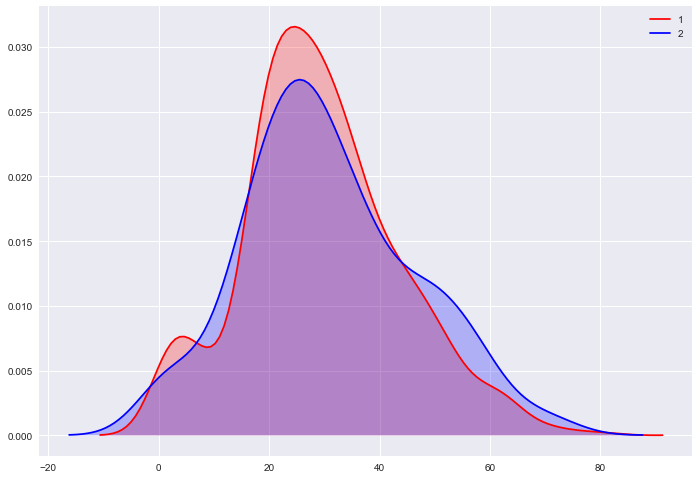

In [20]:
# Как я уже сказал вначале - это только только самое начало няша - саентология это по факту длиннокодия.
# Мы можем как угодно строить красивые графики с использованием индикаторов внутри [df.Embarked=='S'] и дивиться на них,

sns.kdeplot(df['Age'][df.Embarked=='S'], shade=True, color="r", label='1')
sns.kdeplot(df['Age'][df.Embarked=='C'], shade=True, color="b", label='2')

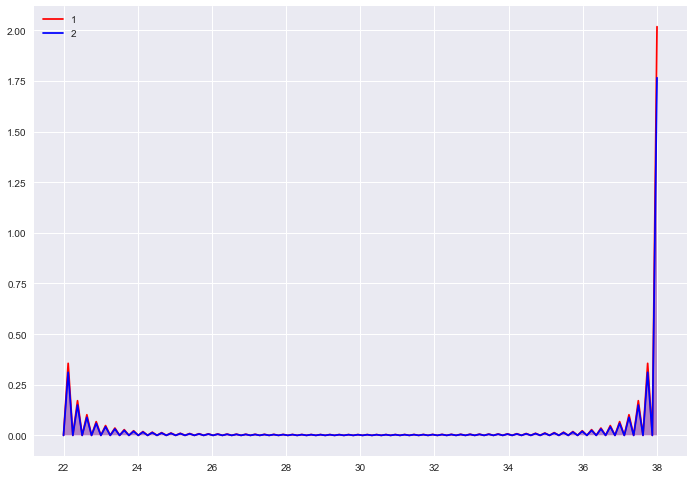

In [19]:
# Мы напишем дохуя кода чтобы оправдать или опровергнуть какуюто нашу теорию.

sns.kdeplot(df_pony['Age'][df_pony.Pclass_1], shade=True, color="r", label='1')
sns.kdeplot(df_pony['Age'][df_pony.Pclass_3], shade=True, color="b", label='2')

# Например, я сказал тебе что Pclass_1 на 80% и более сопоставим с Pclass_3, а теперь внимание на график возрастов

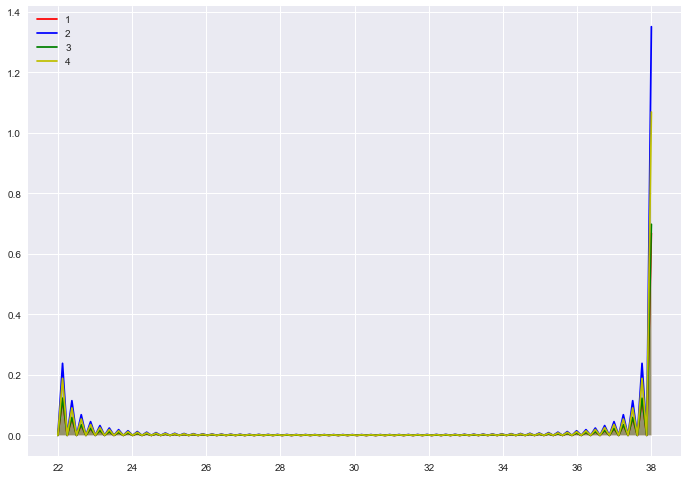

In [21]:
# По возрасту они тоже почти совпадают - так что можем утверждать что первая группа найдена.

sns.kdeplot(df_pony['Age'][df_pony.Pclass_1_M], shade=True, color="r", label='1')
sns.kdeplot(df_pony['Age'][df_pony.Pclass_1_F], shade=True, color="b", label='2')
sns.kdeplot(df_pony['Age'][df_pony.Pclass_3_M], shade=True, color="g", label='3')   
sns.kdeplot(df_pony['Age'][df_pony.Pclass_3_F], shade=True, color="y", label='4')   

In [ ]:
# На сегодня это всё - завтра продолжим. А пока ответь мне на вопрос - данные хорошо подготовленны, но кейс не кислый.
# тут даже мне работы на несколько часов или даже дней - потенциальных групп много + потом алгоритм сравнения писать
# это точно учебный датасет по которому ты решил учиться? или что? если тестовое - то это не уровень джуна:

"""
джуны не умеют растить выборки вправо и вообще готовить данные путём создания новых объектов,
они упарываються об то что есть на входе и долбяться в стену из 10 признаков,
когда для решения нужно сделать 50.
"""

# ты что It- рекрутёром устроился и пытаешься меня захантить? если да - скажи сразу, сделаю красиво.
# я как раз хочу снова на фулл тайм в офис. если нет и это тока те на ознакомление то вникай в текст:

"""Панда в работе это в какойто степени случай реализация конструктора классов (как бы упорото это не звучало)
   
   Исходная выборка являеться классом: проектом объекта,
   Всё что мы из неё создаём - является экземпляром этого класса. 
   
   Когда я прирастил выборку новыми объектами вида: df_name['object_name'] - я просто определил атрибуты этих экземпляров.
   
   Если не бояться это делать - то любая задача по плечу.
   
   Смотри, это задача классификации. Для её решения надо:
   - сначала создать такие экземпляры класса из исходного класса - выборки, которые помогут её решить.
   - и уже только потом пытаться на основании мат.статистики. графиков или просто силы ума - писать код.
   
   т.е запоминай правило: сначала создание признаков для решения задачи и только потом решение задачи с этими признаками.
"""

Поэтому, чтобы тебе сделать ровно то что написано в ТЗ - тебе сначала надо создать признаки, которые будут этом ТЗ отвечать.

In [30]:
# Вот простой пример создания признака:

df_pony['age_S'] = (df['Age'][df.Survived==1])
df_pony['age_S'].value_counts()

# Я только что создал признак, в котором сыществуют только возрст тех, кт овыижил ( и заодно посмотрел уникальные возраста)

24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
30.00    10
19.00     9
32.00     9
18.00     9
29.00     8
31.00     8
28.00     7
4.00      7
34.00     6
42.00     6
26.00     6
40.00     6
16.00     6
25.00     6
48.00     6
33.00     6
17.00     6
23.00     5
1.00      5
50.00     5
45.00     5
21.00     5
3.00      5
38.00     5
39.00     5
         ..
44.00     3
2.00      3
20.00     3
52.00     3
54.00     3
51.00     2
6.00      2
56.00     2
8.00      2
62.00     2
0.75      2
13.00     2
60.00     2
9.00      2
63.00     2
0.83      2
41.00     2
55.00     1
47.00     1
0.92      1
11.00     1
37.00     1
53.00     1
43.00     1
80.00     1
7.00      1
32.50     1
12.00     1
0.67      1
0.42      1
Name: age_S, Length: 65, dtype: int64

In [32]:
# В датасете появилась новая колонка - age_S 

df_pony.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 73 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Embarked_S      891 non-null int64
Embarked_S_M    891 non-null int64
Embarked_S_F    891 non-null int64
Embarked_C      891 non-null int64
Embarked_C_M    891 non-null int64
Embarked_C_F    891 non-null int64
Embarked_Q      891 non-null int64
Embarked_Q_M    891 non-null int64
Embarked_Q_F    891 non-null int64
Parch_0         891 non-null int64
Parch_0_M       891 non-null int64
Parch_0_F       891 non-null int64
Parch_1         891 non-null int64
Parch_1_M  

In [24]:
# технически она имеет вид - возраст в года или Nan.

df_pony['age_S'] 

0       NaN
1      38.0
2      26.0
3      35.0
4       NaN
5       NaN
6       NaN
7       NaN
8      27.0
9      14.0
10      4.0
11     58.0
12      NaN
13      NaN
14      NaN
15     55.0
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21     34.0
22     15.0
23     28.0
24      NaN
25     38.0
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
861     NaN
862    48.0
863     NaN
864     NaN
865    42.0
866    27.0
867     NaN
868     NaN
869     4.0
870     NaN
871    47.0
872     NaN
873     NaN
874    28.0
875    15.0
876     NaN
877     NaN
878     NaN
879    56.0
880    25.0
881     NaN
882     NaN
883     NaN
884     NaN
885     NaN
886     NaN
887    19.0
888     NaN
889    26.0
890     NaN
Name: age_S, Length: 891, dtype: float64

In [33]:
# Если проматать направо то её можно будет увидеть.

df_pony.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_1,Pclass_1_M,Pclass_1_F,Pclass_2,Pclass_2_M,Pclass_2_F,Pclass_3,Pclass_3_M,Pclass_3_F,age_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,0,0,0,0,0,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,1,0,0,0,0,0,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0,0,0,0,0,0,0,0,0,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,0,0,0,0,0,0,0,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,0,0,0,0,0,0,0,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,0,0,0,0,1,0,1,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,0,0,1,0,1,0,0,0,14.0


In [ ]:
# Я сохраню тебе переработанный датасет - попробуй поработать с ним в рамках ТЗ и если потребуеться сделай ещё признаков.

In [34]:
df_pony.to_csv('Pony_train.csv') 

In [3]:
df_1 = pd.read_csv('C:/Users/Battlestation/ML_2018_Edition/Pony_train.csv', sep=',')
df_1.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Pclass_1,Pclass_1_M,Pclass_1_F,Pclass_2,Pclass_2_M,Pclass_2_F,Pclass_3,Pclass_3_M,Pclass_3_F,age_S
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,...,0,0,0,0,0,0,0,0,0,NaN
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,1,0,1,0,0,0,0,0,0,38.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,...,0,0,0,0,0,0,1,0,1,26.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,...,1,0,1,0,0,0,0,0,0,35.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,...,0,0,0,0,0,0,0,0,0,NaN


In [5]:
CorrKoef = df_1.corr()

In [6]:
CorrKoef

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_S_M,...,Pclass_1,Pclass_1_M,Pclass_1_F,Pclass_2,Pclass_2_M,Pclass_2_F,Pclass_3,Pclass_3_M,Pclass_3_F,age_S
Unnamed: 0,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.006303,0.006647,...,0.075528,0.073328,0.036672,-0.008850,-0.016490,-0.001379,-0.079285,0.001503,-0.100194,0.071541
PassengerId,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.006303,0.006647,...,0.075528,0.073328,0.036672,-0.008850,-0.016490,-0.001379,-0.079285,0.001503,-0.100194,0.071541
Survived,-0.005007,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.718908,0.389678,...,0.537736,0.292209,0.427316,0.416778,0.176702,0.369956,0.497437,0.298986,0.375662,NaN
Pclass,-0.035144,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.231487,-0.084922,...,-0.664687,-0.361196,-0.528198,-0.121503,-0.051514,-0.107853,0.324839,0.195246,0.245317,-0.418073
Age,0.036847,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.068386,-0.074048,...,0.177286,0.109903,0.130022,-0.094879,-0.138021,-0.036168,-0.229256,-0.121270,-0.189618,1.000000
SibSp,-0.057527,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.015404,-0.037226,...,-0.011692,-0.030391,0.008092,-0.008583,0.000810,-0.009881,-0.030648,-0.039094,-0.006190,-0.143309
Parch,-0.001652,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.110986,-0.006856,...,0.004274,-0.020178,0.019667,0.107017,0.045957,0.094697,0.018799,-0.024524,0.043579,-0.315599
Fare,0.012658,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.083890,-0.011382,...,0.541822,0.197047,0.500984,-0.067217,-0.031196,-0.058294,-0.146319,-0.078990,-0.117845,0.162648
Embarked_S,0.006303,0.006303,0.718908,-0.231487,-0.068386,-0.015404,0.110986,0.083890,1.000000,0.542042,...,0.297208,0.203473,0.205830,0.482838,0.207566,0.427143,0.292230,0.263820,0.148371,-0.023209
Embarked_S_M,0.006647,0.006647,0.389678,-0.084922,-0.074048,-0.037226,-0.006856,-0.011382,0.542042,1.000000,...,0.180446,0.439791,-0.103731,0.100675,0.395062,-0.089807,0.278471,0.534967,-0.091192,-0.072593


In [7]:
FieldDrop = [i for i in CorrKoef if CorrKoef[i].isnull().drop_duplicates().values[0]]

In [8]:
FieldDrop

['Parch_3_M',
 'Parch_4',
 'Parch_4_M',
 'Parch_4_F',
 'Parch_5_M',
 'Parch_6',
 'Parch_6_M',
 'SibSp_3_M',
 'SibSp_5',
 'SibSp_5_M',
 'SibSp_5_F',
 'SibSp_8',
 'SibSp_8_M',
 'SibSp_8_F']

In [9]:
df_1_drop = df_1.drop(['Parch_3_M',
 'Parch_4',
 'Parch_4_M',
 'Parch_4_F',
 'Parch_5_M',
 'Parch_6',
 'Parch_6_M',
 'SibSp_3_M',
 'SibSp_5',
 'SibSp_5_M',
 'SibSp_5_F',
 'SibSp_8',
 'SibSp_8_M',
 'SibSp_8_F'], axis=1)

In [10]:
df_1_drop.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Pclass_1,Pclass_1_M,Pclass_1_F,Pclass_2,Pclass_2_M,Pclass_2_F,Pclass_3,Pclass_3_M,Pclass_3_F,age_S
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,...,0,0,0,0,0,0,0,0,0,NaN
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,1,0,1,0,0,0,0,0,0,38.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,...,0,0,0,0,0,0,1,0,1,26.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,...,1,0,1,0,0,0,0,0,0,35.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,...,0,0,0,0,0,0,0,0,0,NaN


In [11]:
df_1_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 60 columns):
Unnamed: 0      891 non-null int64
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Embarked_S      891 non-null int64
Embarked_S_M    891 non-null int64
Embarked_S_F    891 non-null int64
Embarked_C      891 non-null int64
Embarked_C_M    891 non-null int64
Embarked_C_F    891 non-null int64
Embarked_Q      891 non-null int64
Embarked_Q_M    891 non-null int64
Embarked_Q_F    891 non-null int64
Parch_0         891 non-null int64
Parch_0_M       891 non-null int64
Parch_0_F       891 non-null int64
Parch_1    

In [12]:
CorrKoef_1 = df_1_drop.corr()

In [24]:
CorrKoef_1.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_S_M,...,Pclass_1,Pclass_1_M,Pclass_1_F,Pclass_2,Pclass_2_M,Pclass_2_F,Pclass_3,Pclass_3_M,Pclass_3_F,age_S
Unnamed: 0,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.006303,0.006647,...,0.075528,0.073328,0.036672,-0.008850,-0.016490,-0.001379,-0.079285,0.001503,-0.100194,0.071541
PassengerId,1.000000,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.006303,0.006647,...,0.075528,0.073328,0.036672,-0.008850,-0.016490,-0.001379,-0.079285,0.001503,-0.100194,0.071541
Survived,-0.005007,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.718908,0.389678,...,0.537736,0.292209,0.427316,0.416778,0.176702,0.369956,0.497437,0.298986,0.375662,NaN
Pclass,-0.035144,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.231487,-0.084922,...,-0.664687,-0.361196,-0.528198,-0.121503,-0.051514,-0.107853,0.324839,0.195246,0.245317,-0.418073
Age,0.036847,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.068386,-0.074048,...,0.177286,0.109903,0.130022,-0.094879,-0.138021,-0.036168,-0.229256,-0.121270,-0.189618,1.000000


In [15]:
FieldDrop_1 = [i for i in CorrKoef_1 if CorrKoef_1[i].isnull().drop_duplicates().values[0]]

In [16]:
FieldDrop_1

[]

In [25]:
CorField = []
for i in CorrKoef_1:
    for j in CorrKoef_1.index[CorrKoef_1[i] > 0.9]:
        if i <> j and j not in CorField and i not in CorField:
            CorField.append(j)
            print "%s-->%s: r^2=%f" % (i,j, CorrKoef_1[i][CorrKoef_1.index==j].values[0])

SyntaxError: invalid syntax (<ipython-input-25-ba79de390df5>, line 4)

In [21]:
CorField = []

In [28]:
for i in CorrKoef_1:
    for j in CorrKoef_1.index[CorrKoef_1[i] > 0.9]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print("%s-->%s: r^2=%f" % (i,j, CorrKoef_1[i][CorrKoef_1.index==j].values[0]))

Unnamed: 0-->PassengerId: r^2=1.000000
Age-->age_S: r^2=1.000000
Embarked_Q-->Embarked_Q_F: r^2=0.947035
Parch_3-->Parch_3_F: r^2=1.000000
Parch_5-->Parch_5_F: r^2=1.000000
Parch_5-->Parch_6_F: r^2=1.000000
SibSp_3-->SibSp_3_F: r^2=1.000000


In [41]:
import ml_metrics, string, re, pylab as pl

In [36]:
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [37]:
models = []
models.append(RandomForestClassifier(n_estimators=165, max_depth=4, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =4))
models.append(KNeighborsClassifier(n_neighbors=20))
models.append(GaussianNB())

In [42]:
TRNtrain, TRNtest, TARtrain, TARtest = train_test_split(train, target, test_size=0.3, random_state=0)